# Descriptive Analytics

This section contains the descriptive analytics used to explore the datasets related to the required insights aimed to be provided to the brand, their consumer and the operational device. <br> The descriptive analytics section covers the following:
- Description of Dataset
- The distribution of data
- The variance of attributes
- Visualisation of distribution and variance

#### Imports

In [2]:
# Library Imports
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean, median, mode, stdev
%matplotlib inline

<br>

#### USER Defined Functions

In [3]:
def extract(folderName):
    # User prompt - Beginning process
    print("Starting Extraction...")\
    
    # Empty files list
    files_list = []
    
    #Obtain file names
    path = "../DATA/{}".format(folderName)
        
    from os import listdir

    def find_csv_filenames( path_to_dir, suffix=".csv" ):
        filenames = listdir(path_to_dir)
        return [ filename for filename in filenames if filename.endswith( suffix ) ]

    filenames = find_csv_filenames(path)
    for name in filenames:
        files_list.append(name)
        
    x = sorted(files_list)
    # Empty dictionary to hold dfs
    global d
    d = []
    
    # For each of the files in the array list, create a pd df
    for i in x:
        print("Creating df for: ", i)
        d.append(pd.read_csv("../DATA/{}/{}".format(folderName, i), sep=",", header=0))
    
    # Confirmation of completion
    print("Complete!")
    return;

In [4]:
# Formats the DFs to an eaiser accessible name for each of the requirements.
def brandDF():
    global df1, df2, df3, df4_Cart, df4_Dev, df5, df6_7
    df1 = d[0]
    df2 = d[1]
    df3 = d[2]
    df4_Cart = d[3]
    df4_Dev = d[4]
    df5 = d[5]
    df6_7 = d[6]
    return;

def proRepDF():
    return;

def conDF():
    return;

def opDF():
    return;

In [5]:
# Function provides details about a specified DF
def dataShape(dfName):
    print("Data Shape: \n", dfName.shape, "\n")
    print("Data Count: \n",dfName.count(), "\n")
    print("Data Info:")
    print(dfName.info(), "\n")
    print("Unique Values in Each Column: ")
    for col in dfName:
        print(col+": \n", dfName[col].unique(), "\n")

In [6]:
def nanValues(dfName):
    df = dfName
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return missing_data;

In [7]:
# The function is used to show the distribution of data for the categorical datatypes.
# The function is operated by specifying a DF and attribute name from the available datasets.
# This then produces a bar chart to display the distribution of data for the entered attribute.
def dist(dfName, colName):
    AR_count = dfName[colName].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(AR_count.index, AR_count.values, alpha=0.9)
    plt.title('Frequency Distribution of "{var_name}"'.format(var_name=colName))
    plt.xticks(rotation='90')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(colName, fontsize=12)
    plt.show()

In [8]:
# Function used to calculate the mean, median, mode and standard deviation of a given dataset attribute.
def mmm(dfName, colName):
    mean = dfName[colName].mean()
    median = dfName[colName].median()
    mode = dfName[colName].mode()
    stan = dfName[colName].std()
    print("3Ms for {}: \n".format(colName), "Mean: ", mean, "\n Median: ", median, "\n Mode: ", mode,"\n Standard Dev: ", stan, "\n")
    return;

In [9]:
# Function used to show variance of data for a single attribute.
def singleBoxplot(dfName, colName):
    sns.set(style="darkgrid")
    plt.figure(figsize=(10,8))
    ax = sns.boxplot(x=colName, data=dfName, orient="v")
    
# Function used to show variance of data for based on two attributes.
def boxplot(dfName, XcolName, YcolName):
    sns.set(style="darkgrid")
    plt.figure(figsize=(10,8))
    ax = sns.boxplot(x=XcolName, y=YcolName, data=dfName, orient="v")

In [10]:
def histo(dfName, colName):
    # Drop any null values
    filter_data = dfName.dropna(subset=[colName])
    plt.figure(figsize=(14,8))
    # Plot histogram with filtered data
    sns.distplot(filter_data[colName], kde=False)
    return;

<br><br>
## Brand Insight

In [11]:
extract("Brand")
brandDF()

Starting Extraction...
Creating df for:  requirement1.csv
Creating df for:  requirement2.csv
Creating df for:  requirement3.csv
Creating df for:  requirement4_Cart_.csv
Creating df for:  requirement4_Dev_.csv
Creating df for:  requirement5.csv
Creating df for:  requirement6_7.csv
Complete!



### Requirement 1
For the brand to understand what product and product type is being used as well as the clientele using them

In [12]:
dataShape(df1)

Data Shape: 
 (767, 34) 

Data Count: 
 idTreatmentCartDetails    767
CutitronicsTreatmentID    767
TreatmentNumber           767
CutitronicsCartID         753
CutitronicsSKUID          767
CartLevel                 754
CartState                 754
CartDispensedAmount       754
CutitronicsParameterID    754
CartEncBlock               38
CartDecBlock               47
CartEnvTemperature        767
CartEnvHumidity           767
CartEnvPollution          767
CartEnvUv                 767
Tracked                    29
CreationDate               29
CreationUser                0
LastUpdateDate              0
LastUpdateUser              0
CutitronicsClientID       767
TreatmentStartDate        743
TreatmentEndDate            0
TreatmentType             767
Latitude                  767
Longitude                 767
YOB                       767
Gender                    767
FITZP                     767
SkinConcerns                0
Allergies                   0
CutitronicsSKUCat         767


CutitronicsSKUID: 
 ['0caf1b12-5f93-11ea-8f74-106530b25ee4'
 '0caf1b13-5f93-11ea-a093-106530b25ee4'
 '0caf1b14-5f93-11ea-b4c7-106530b25ee4'
 'f1fdf4a0-0f91-425d-8950-946b6d3365dc'
 'c41735f1-8042-4014-a661-20173ffbfe8a'] 

CartLevel: 
 [ 35.  32.  30.  29.  27.  26.  25.  23.  21.  20.  19.  17.  14.  11.
  10.   8.   6.   4.   1.   0.  33.  24.  22.  18.  16.  13.   9.   3.
  15.   5.  34.  31.  28.  12.   2.   7.  39.  38.  37. 100.  nan] 

CartState: 
 ['inUse' 'empty' 'FACTORY' nan] 

CartDispensedAmount: 
 [ 3.  2.  1.  0.  5. nan] 

CutitronicsParameterID: 
 ['AAAAAA' 'e73a9d3b-5887-4bdb-bbf7-855791d9acce'
 '430651f0-34a1-4f60-adb9-64aedcfb29ac'
 '59f9a2e3-b8e4-43e0-87a5-64d9cafe936c'
 '91adf63c-f6ca-4596-82b0-373c310cf37d'
 '3a004b37-731a-4b1c-ae8c-643e6b3ad126'
 'da2aae68-4e68-4919-97f8-fa8d9c0eaddc'
 '77a64d86-2698-4705-a930-9aaef0806d7f'
 '14306cda-d1bb-4b76-b5ac-1ca8ec7815d5'
 '0349f1a6-33a4-46ed-a133-f3eb345e0778'
 'c0be20f9-2ce5-413a-9f55-0426d4ac0e56'
 '11bd1556-4eda-4ba8

,Total,Percent
Allergies,767,100.000000
SkinConcerns,767,100.000000
CreationUser,767,100.000000
LastUpdateDate,767,100.000000
LastUpdateUser,767,100.000000
TreatmentEndDate,767,100.000000
CreationDate,738,96.219035
Tracked,738,96.219035
CartEncBlock,729,95.045632
CartDecBlock,720,93.872229


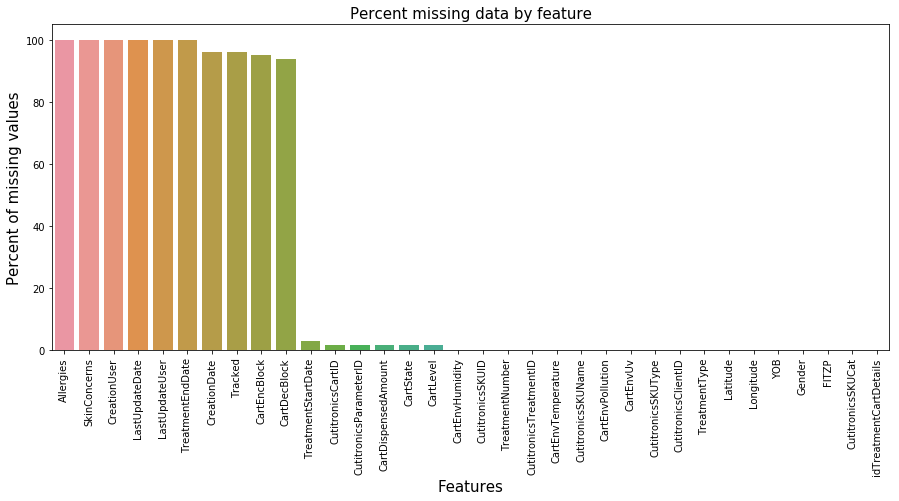

In [13]:
nanValues(df1)

#### Measure of Centre & Distribution

In [14]:
mmm(df1, 'CartLevel')
mmm(df1, 'CartDispensedAmount')
mmm(df1, 'CartEnvTemperature')
mmm(df1, 'CartEnvHumidity')
mmm(df1, 'CartEnvPollution')
mmm(df1, 'CartEnvUv')

3Ms for CartLevel: 
 Mean:  19.371352785145888 
 Median:  20.0 
 Mode:  0    0.0
dtype: float64 
 Standard Dev:  11.788531871785839 

3Ms for CartDispensedAmount: 
 Mean:  1.8222811671087533 
 Median:  2.0 
 Mode:  0    2.0
dtype: float64 
 Standard Dev:  0.9320796525024012 

3Ms for CartEnvTemperature: 
 Mean:  73.77574967405477 
 Median:  78.0 
 Mode:  0    10
dtype: int64 
 Standard Dev:  22.67212747310179 

3Ms for CartEnvHumidity: 
 Mean:  76.82398956975229 
 Median:  79.0 
 Mode:  0    79
dtype: int64 
 Standard Dev:  18.265850750643935 

3Ms for CartEnvPollution: 
 Mean:  73.92568448500651 
 Median:  77.0 
 Mode:  0    20
dtype: int64 
 Standard Dev:  21.53128648433611 

3Ms for CartEnvUv: 
 Mean:  74.41199478487614 
 Median:  79.0 
 Mode:  0    8
dtype: int64 
 Standard Dev:  23.108773599977393 



In [15]:
df1.describe()

,idTreatmentCartDetails,TreatmentNumber,CartLevel,CartDispensedAmount,CartEnvTemperature,CartEnvHumidity,CartEnvPollution,CartEnvUv,CreationUser,LastUpdateDate,LastUpdateUser,TreatmentEndDate,Latitude,Longitude,YOB,FITZP,SkinConcerns,Allergies
count,767.000000,767.000000,754.000000,754.000000,767.000000,767.000000,767.000000,767.000000,0.0,0.0,0.0,0.0,767.000000,767.000000,767.000000,767.000000,0.0,0.0
mean,384.033898,8.645372,19.371353,1.822281,73.775750,76.823990,73.925684,74.411995,NaN,NaN,NaN,NaN,41.054607,-5.584319,1989.014342,4.050847,NaN,NaN
std,221.614946,5.728125,11.788532,0.932080,22.672127,18.265851,21.531286,23.108774,NaN,NaN,NaN,NaN,3.373197,6.663277,4.097831,0.252964,NaN,NaN
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,10.100000,-7.550000,1972.000000,1.000000,NaN,NaN
25%,192.500000,4.000000,10.000000,1.000000,68.000000,68.000000,67.000000,68.000000,NaN,NaN,NaN,NaN,38.880280,-7.550000,1990.000000,4.000000,NaN,NaN
50%,384.000000,8.000000,20.000000,2.000000,78.000000,79.000000,77.000000,79.000000,NaN,NaN,NaN,NaN,38.880280,-6.975278,1990.000000,4.000000,NaN,NaN
75%,575.500000,13.000000,29.000000,3.000000,89.000000,89.000000,88.000000,89.000000,NaN,NaN,NaN,NaN,43.016666,-6.975278,1990.000000,4.000000,NaN,NaN
max,768.000000,26.000000,100.000000,5.000000,99.000000,99.000000,99.000000,99.000000,NaN,NaN,NaN,NaN,51.500000,22.200000,1990.000000,5.000000,NaN,NaN


#### Visualising Categorical Data

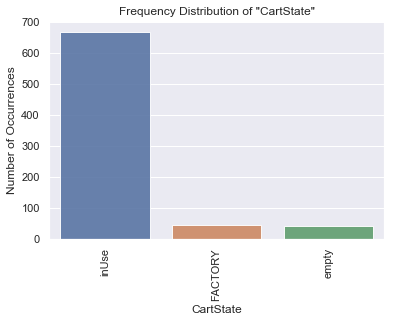

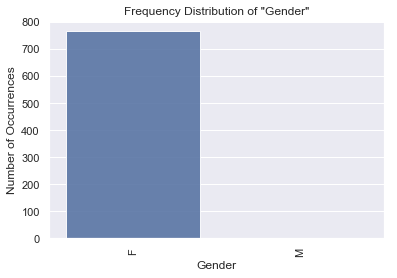

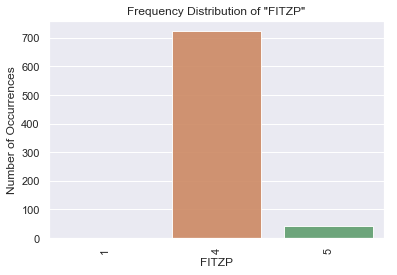

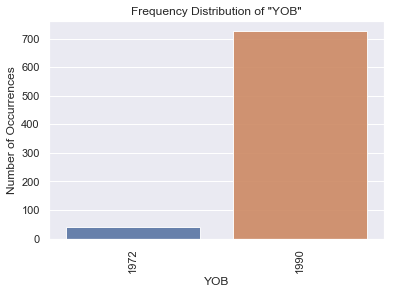

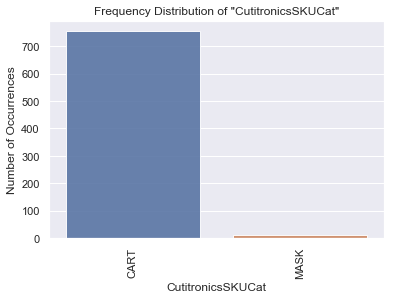

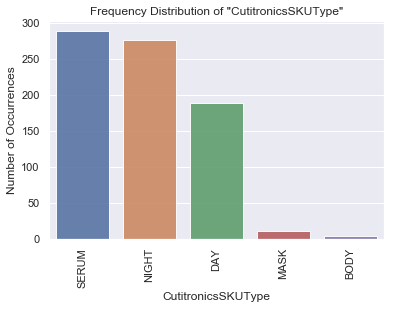

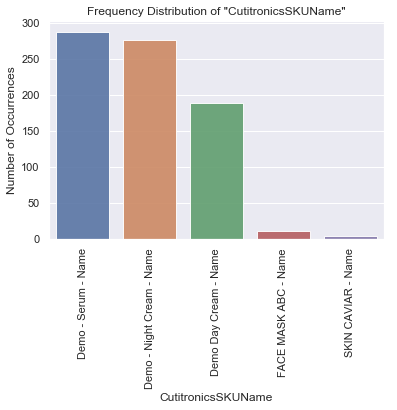

In [16]:
dist(df1, 'CartState')
dist(df1, 'Gender')
dist(df1, 'FITZP')
dist(df1, 'YOB')
dist(df1, 'CutitronicsSKUCat')
dist(df1, 'CutitronicsSKUType')
dist(df1, 'CutitronicsSKUName')

#### Visualising Numerical Data

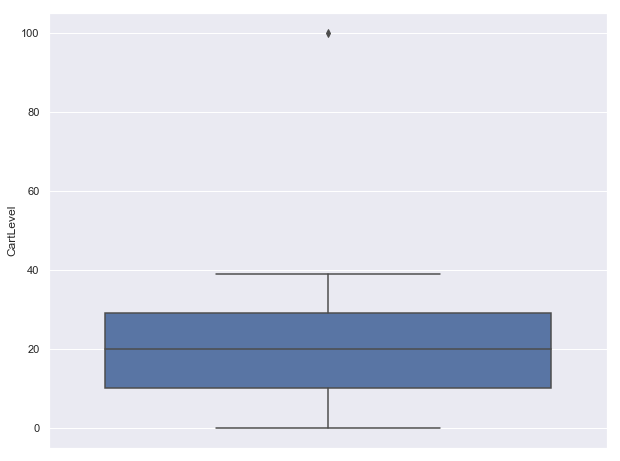

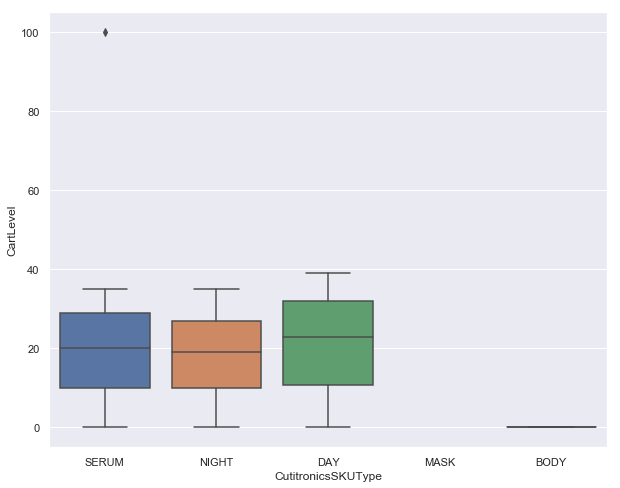

In [17]:
singleBoxplot(df1, 'CartLevel')
boxplot(df1, 'CutitronicsSKUType', 'CartLevel'  )

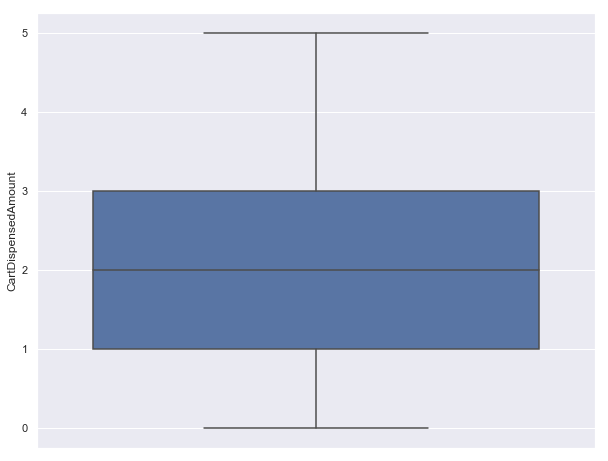

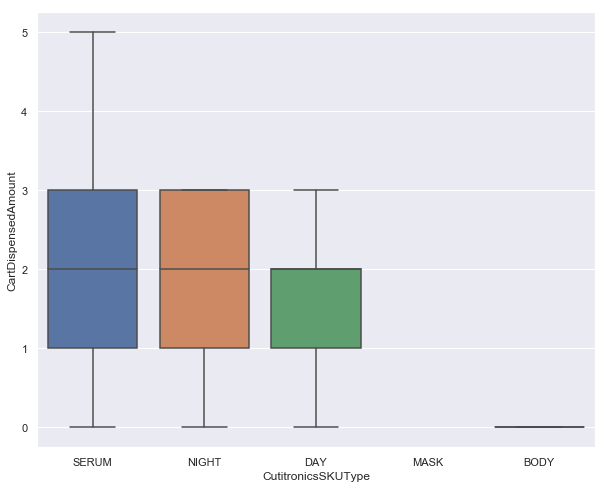

In [18]:
singleBoxplot(df1, 'CartDispensedAmount')
boxplot(df1, 'CutitronicsSKUType', 'CartDispensedAmount'  )

/Users/andrewfarrell/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


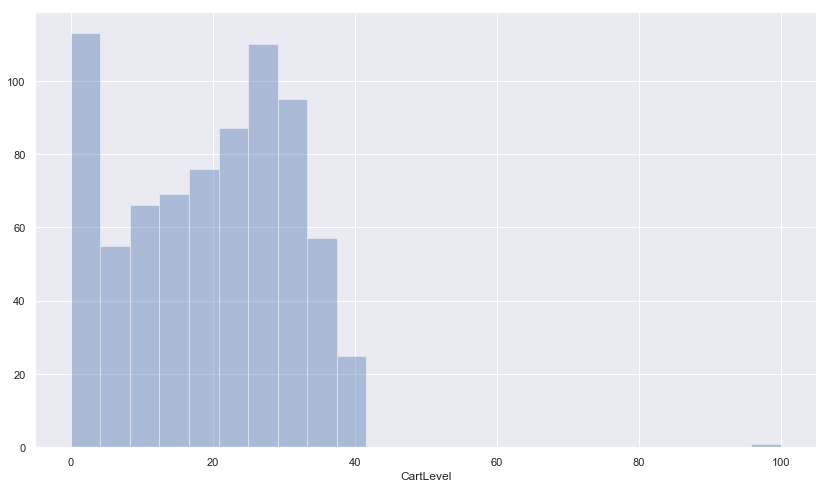

In [19]:
histo(df1, 'CartLevel')

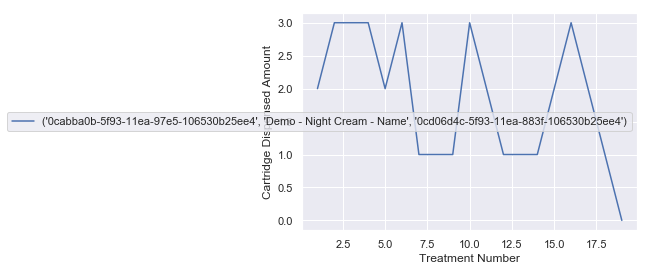

<Figure size 1440x720 with 0 Axes>

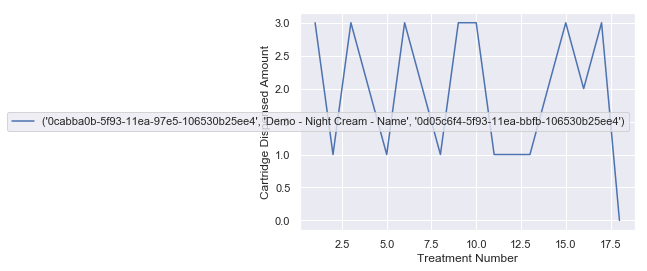

<Figure size 1440x720 with 0 Axes>

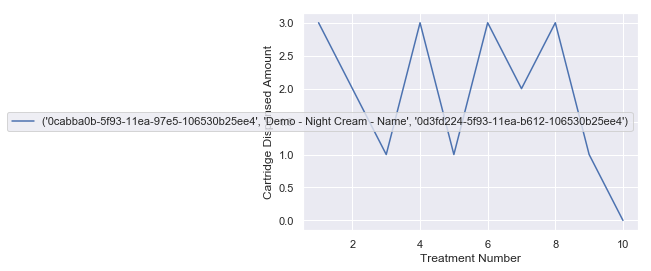

<Figure size 1440x720 with 0 Axes>

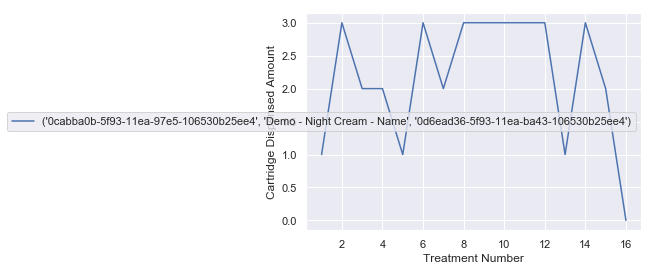

<Figure size 1440x720 with 0 Axes>

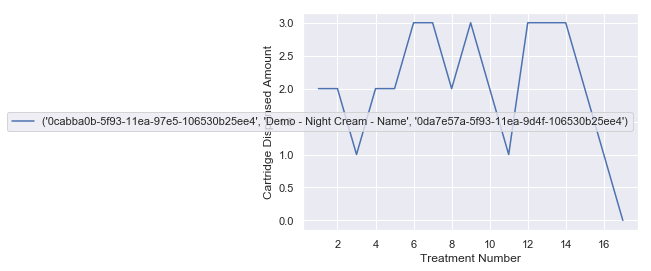

<Figure size 1440x720 with 0 Axes>

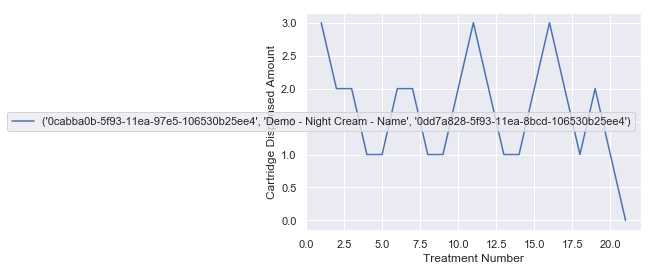

<Figure size 1440x720 with 0 Axes>

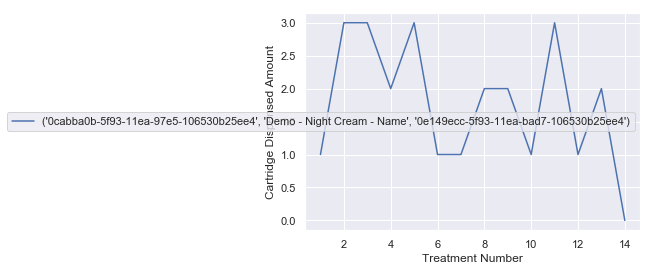

<Figure size 1440x720 with 0 Axes>

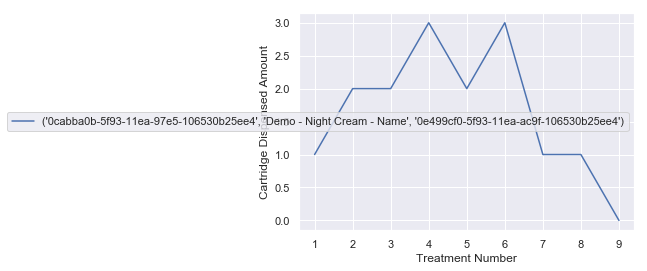

<Figure size 1440x720 with 0 Axes>

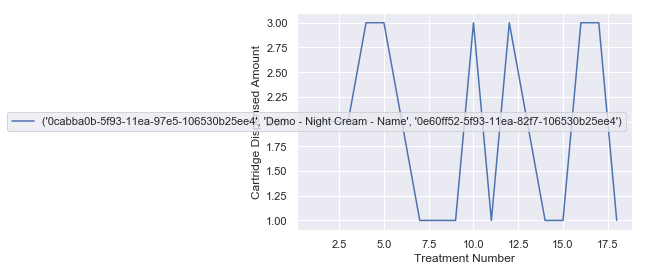

<Figure size 1440x720 with 0 Axes>

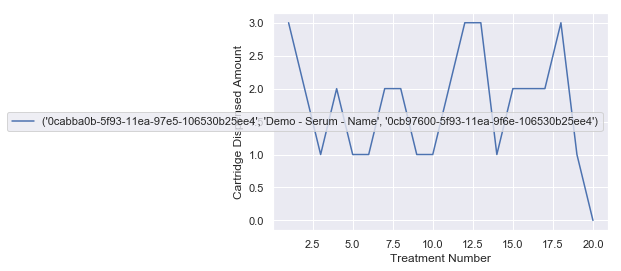

<Figure size 1440x720 with 0 Axes>

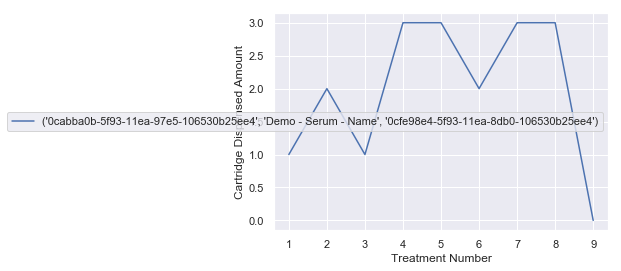

<Figure size 1440x720 with 0 Axes>

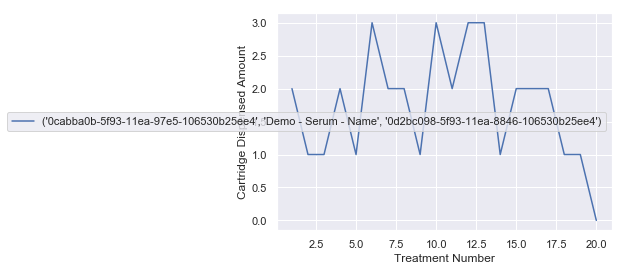

<Figure size 1440x720 with 0 Axes>

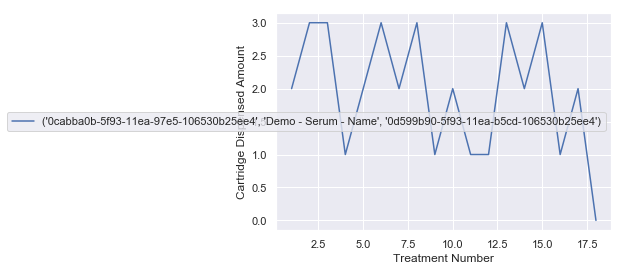

<Figure size 1440x720 with 0 Axes>

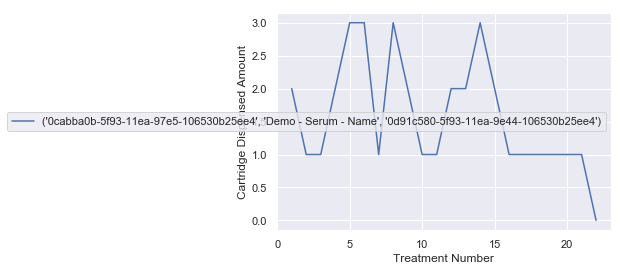

<Figure size 1440x720 with 0 Axes>

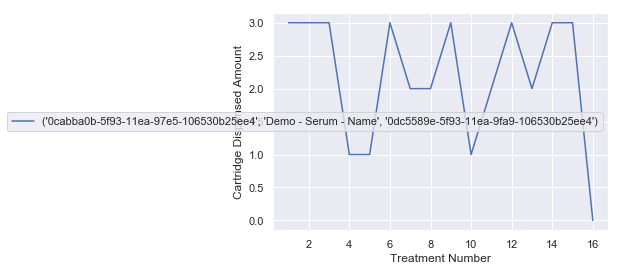

<Figure size 1440x720 with 0 Axes>

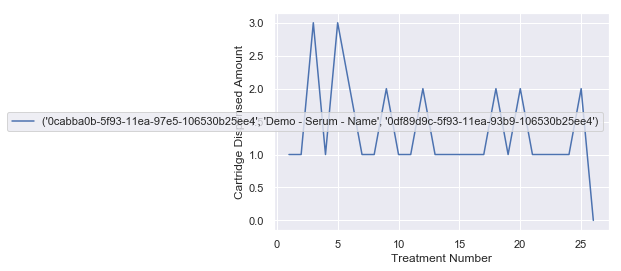

<Figure size 1440x720 with 0 Axes>

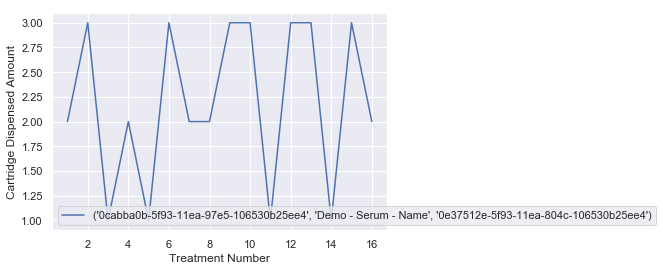

<Figure size 1440x720 with 0 Axes>

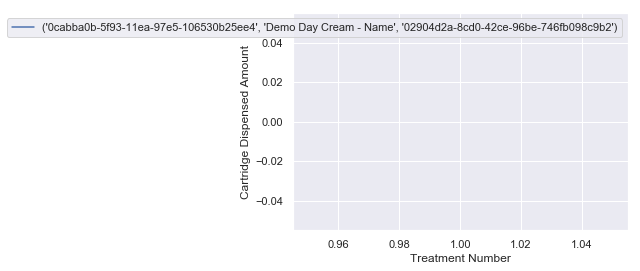

<Figure size 1440x720 with 0 Axes>

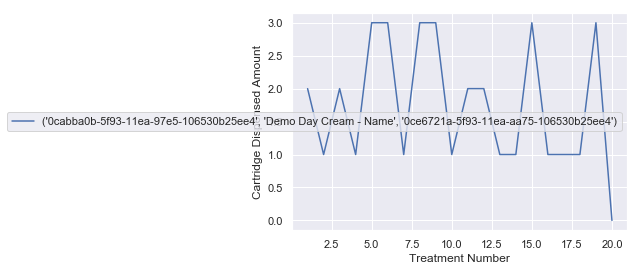

<Figure size 1440x720 with 0 Axes>

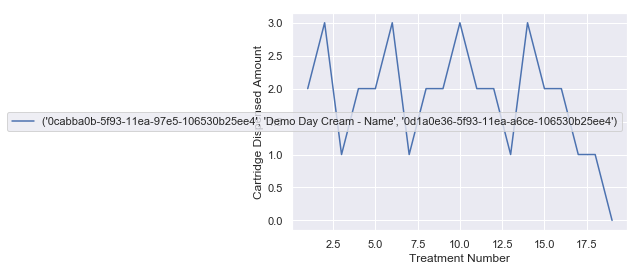

<Figure size 1440x720 with 0 Axes>

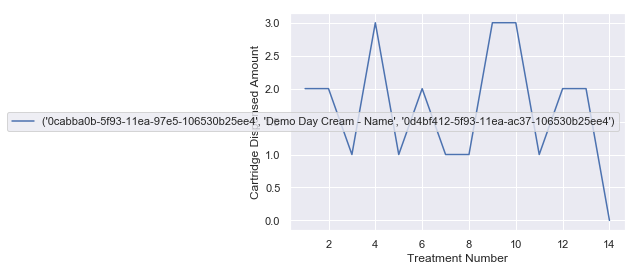

<Figure size 1440x720 with 0 Axes>

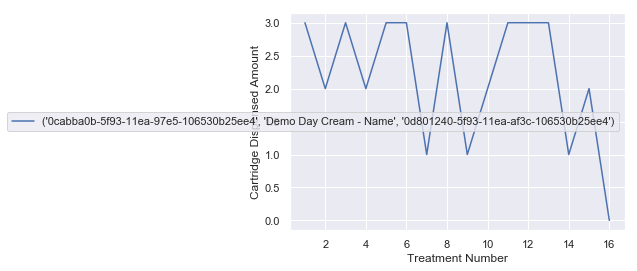

<Figure size 1440x720 with 0 Axes>

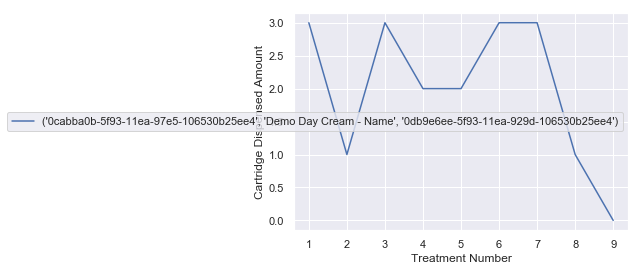

<Figure size 1440x720 with 0 Axes>

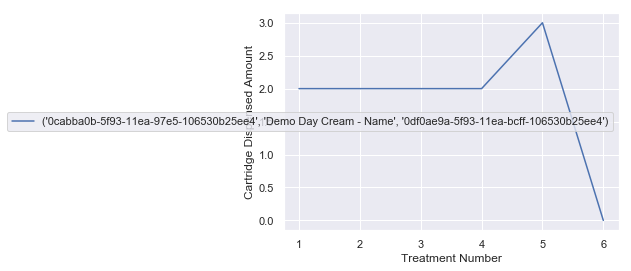

<Figure size 1440x720 with 0 Axes>

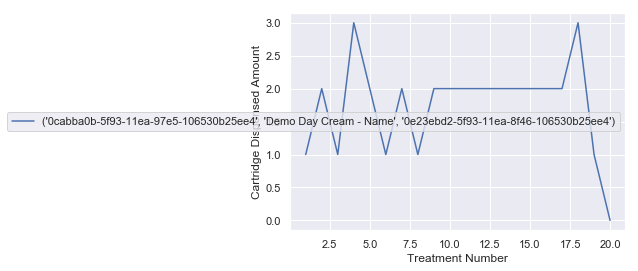

<Figure size 1440x720 with 0 Axes>

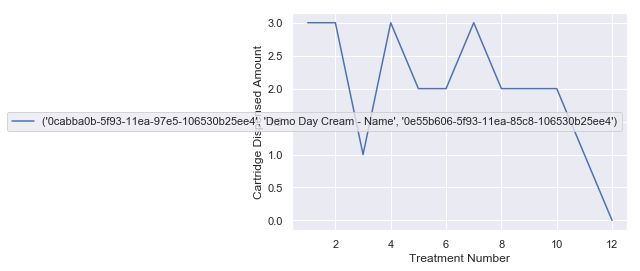

<Figure size 1440x720 with 0 Axes>

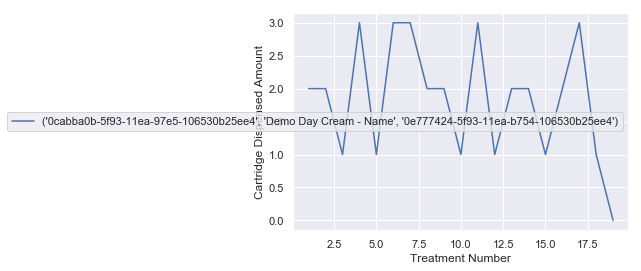

<Figure size 1440x720 with 0 Axes>

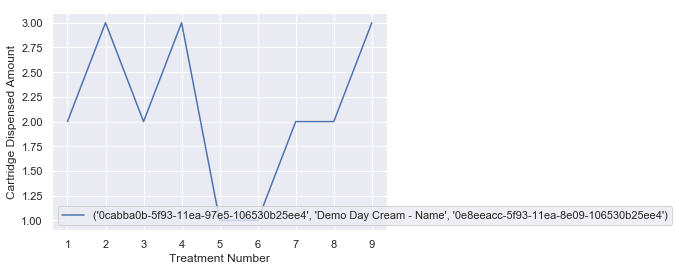

<Figure size 1440x720 with 0 Axes>

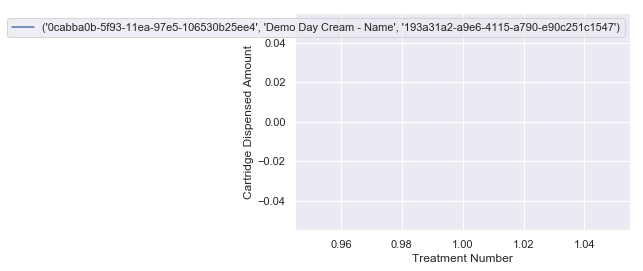

<Figure size 1440x720 with 0 Axes>

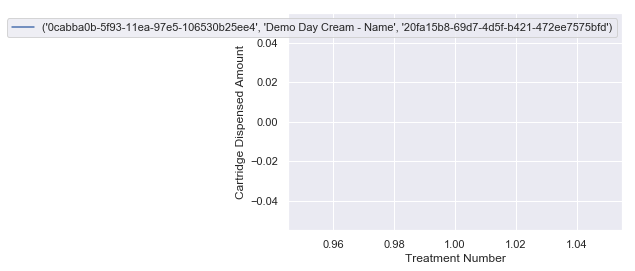

<Figure size 1440x720 with 0 Axes>

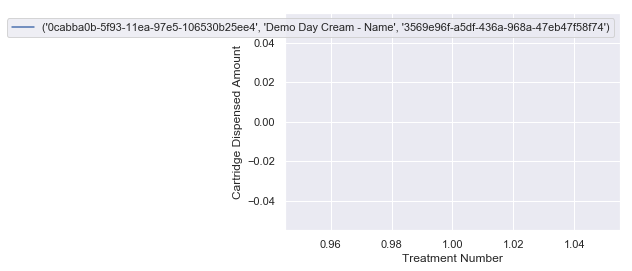

<Figure size 1440x720 with 0 Axes>

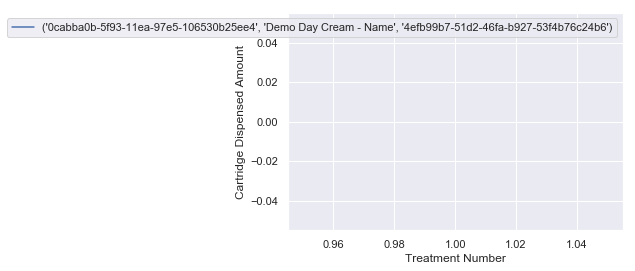

<Figure size 1440x720 with 0 Axes>

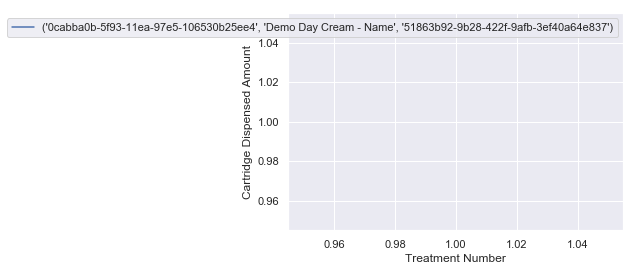

<Figure size 1440x720 with 0 Axes>

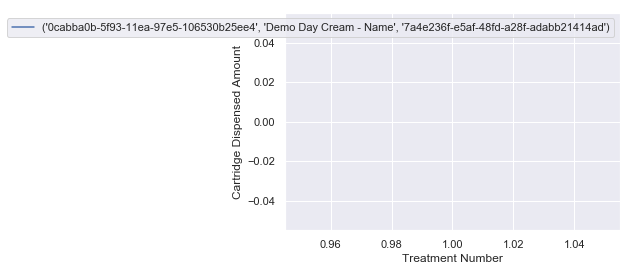

<Figure size 1440x720 with 0 Axes>

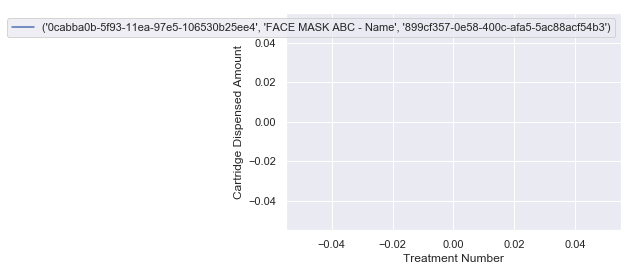

<Figure size 1440x720 with 0 Axes>

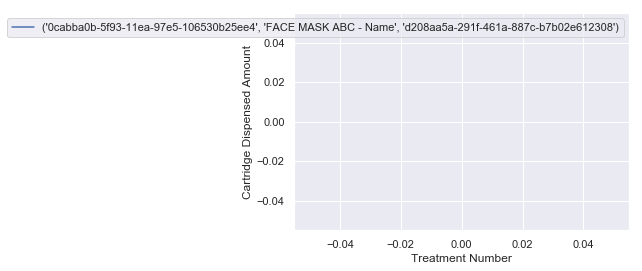

<Figure size 1440x720 with 0 Axes>

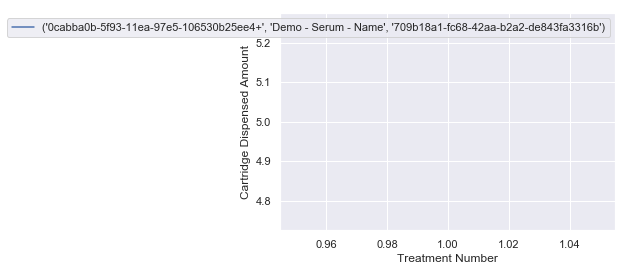

<Figure size 1440x720 with 0 Axes>

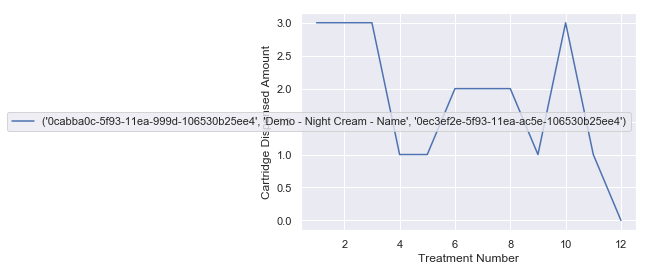

<Figure size 1440x720 with 0 Axes>

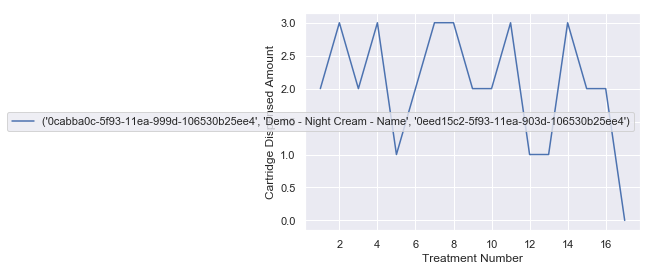

<Figure size 1440x720 with 0 Axes>

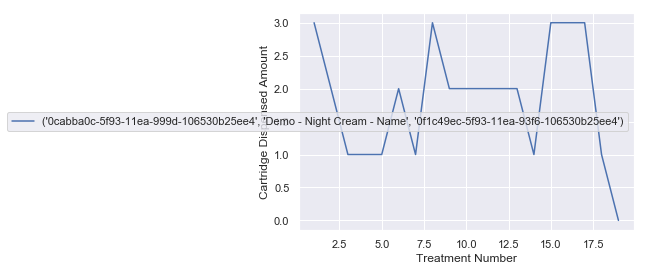

<Figure size 1440x720 with 0 Axes>

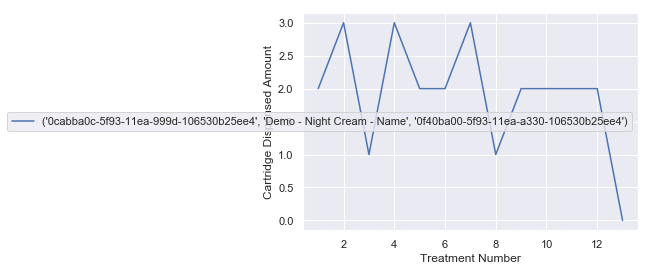

<Figure size 1440x720 with 0 Axes>

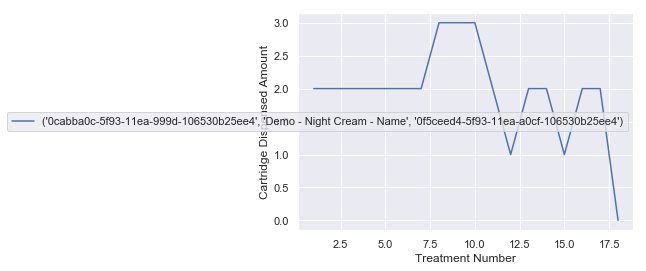

<Figure size 1440x720 with 0 Axes>

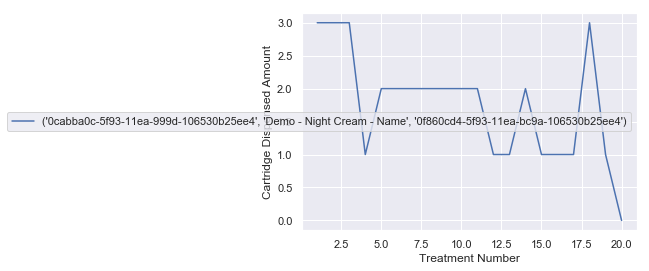

<Figure size 1440x720 with 0 Axes>

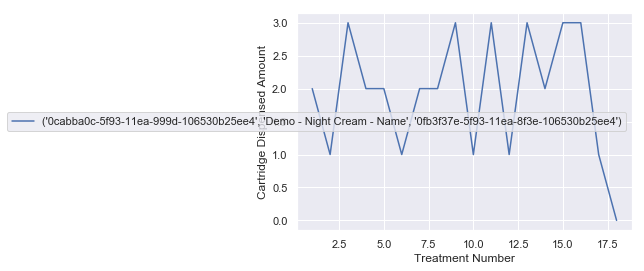

<Figure size 1440x720 with 0 Axes>

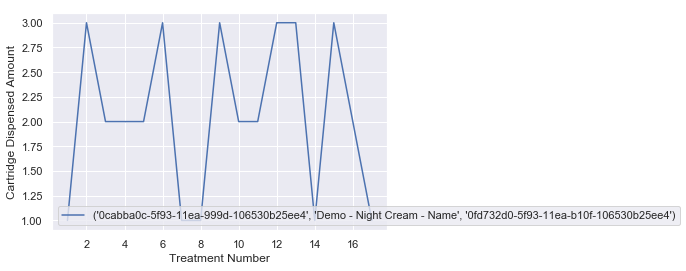

<Figure size 1440x720 with 0 Axes>

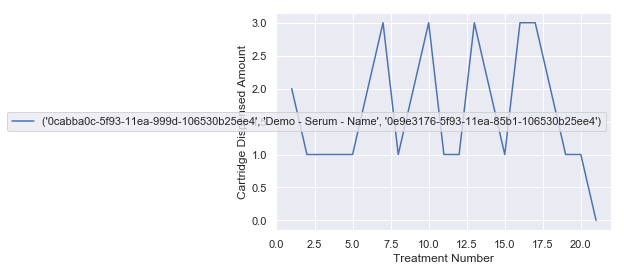

<Figure size 1440x720 with 0 Axes>

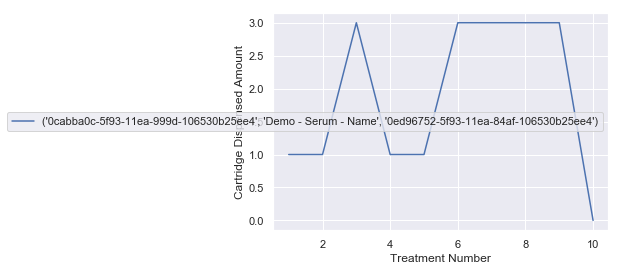

<Figure size 1440x720 with 0 Axes>

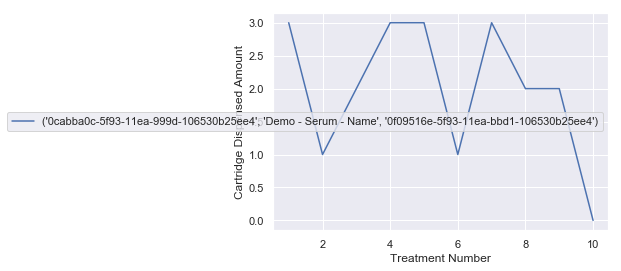

<Figure size 1440x720 with 0 Axes>

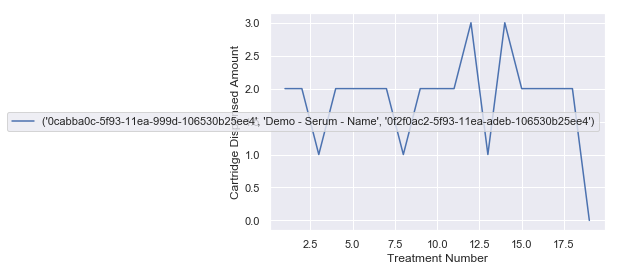

<Figure size 1440x720 with 0 Axes>

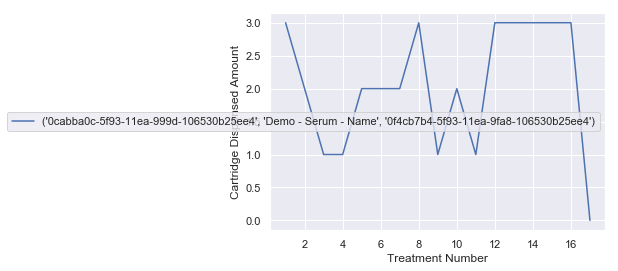

<Figure size 1440x720 with 0 Axes>

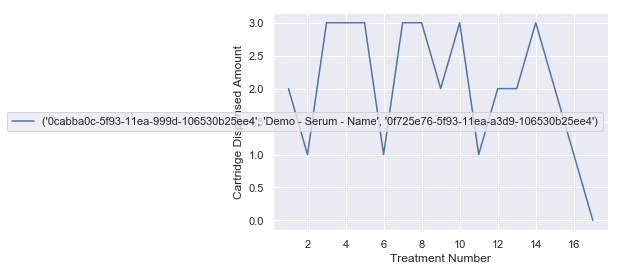

<Figure size 1440x720 with 0 Axes>

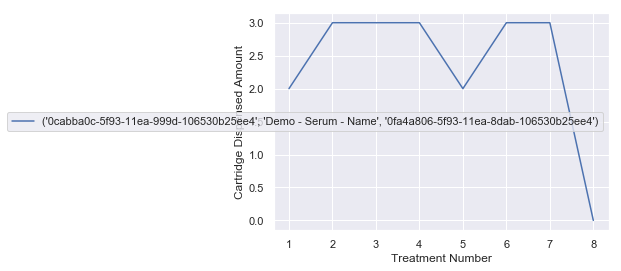

<Figure size 1440x720 with 0 Axes>

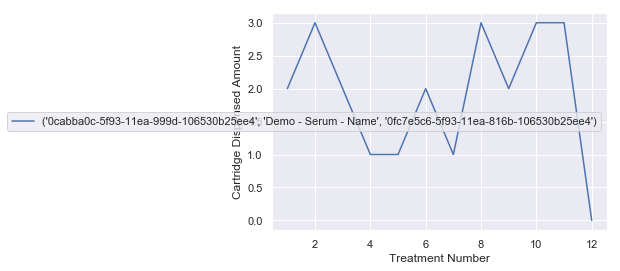

<Figure size 1440x720 with 0 Axes>

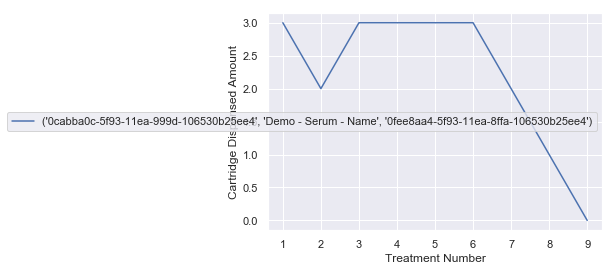

<Figure size 1440x720 with 0 Axes>

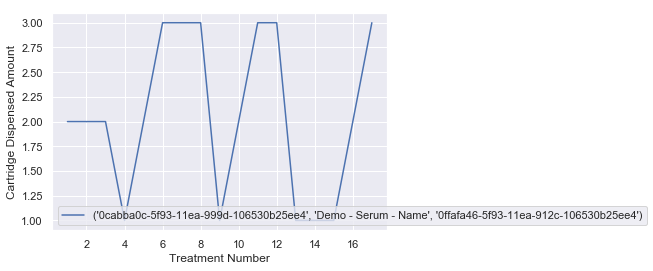

<Figure size 1440x720 with 0 Axes>

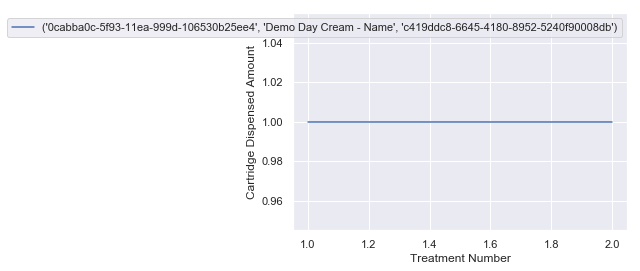

<Figure size 1440x720 with 0 Axes>

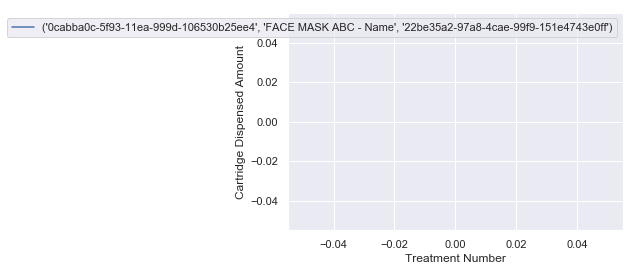

<Figure size 1440x720 with 0 Axes>

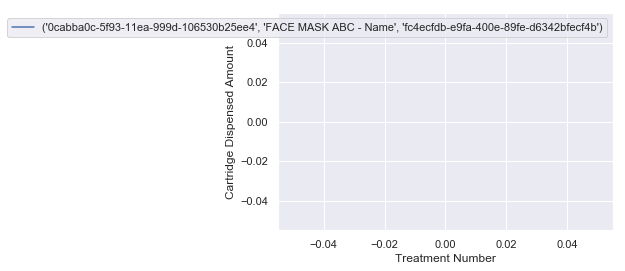

<Figure size 1440x720 with 0 Axes>

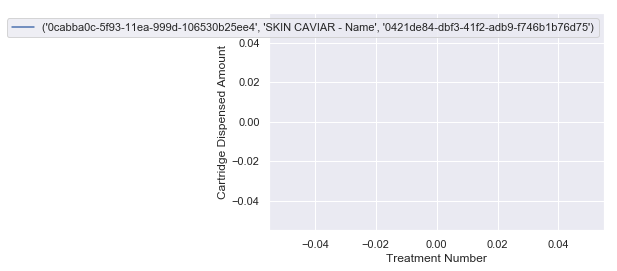

<Figure size 1440x720 with 0 Axes>

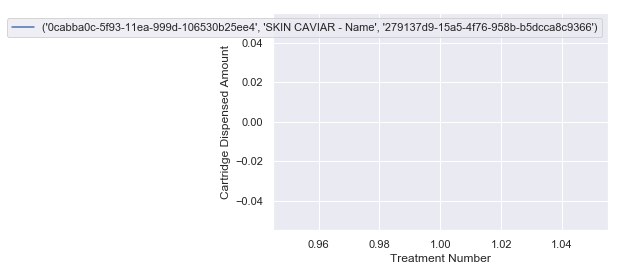

<Figure size 1440x720 with 0 Axes>

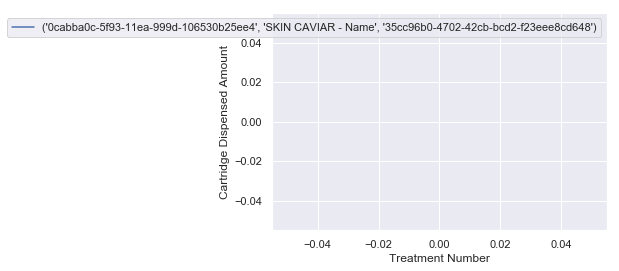

<Figure size 1440x720 with 0 Axes>

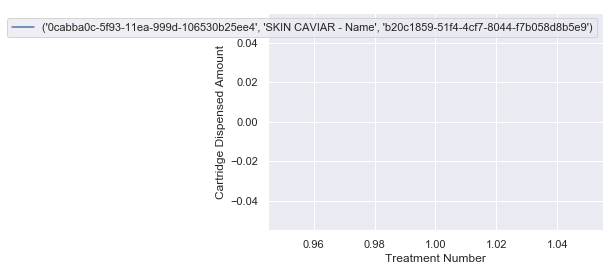

<Figure size 1440x720 with 0 Axes>

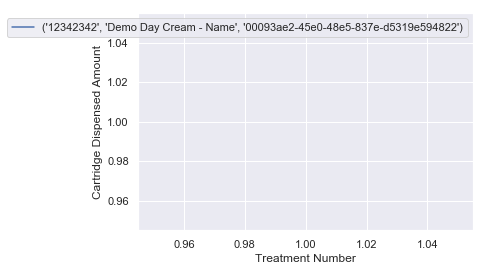

<Figure size 1440x720 with 0 Axes>

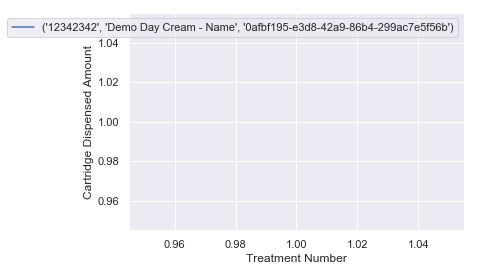

<Figure size 1440x720 with 0 Axes>

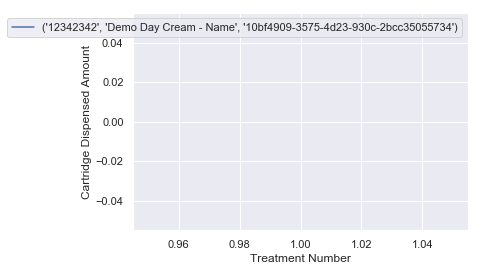

<Figure size 1440x720 with 0 Axes>

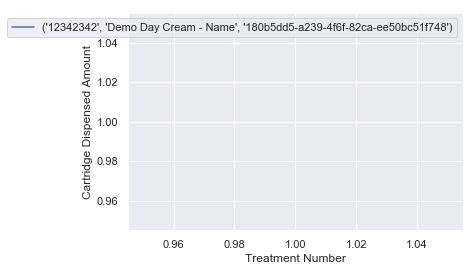

<Figure size 1440x720 with 0 Axes>

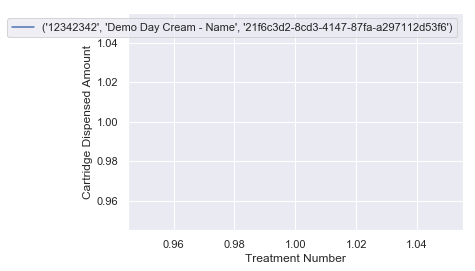

<Figure size 1440x720 with 0 Axes>

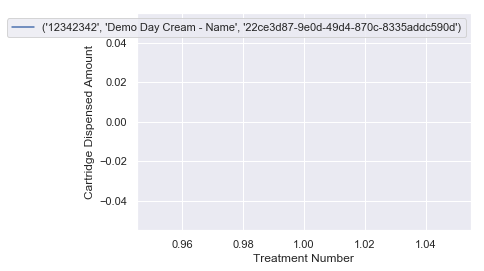

<Figure size 1440x720 with 0 Axes>

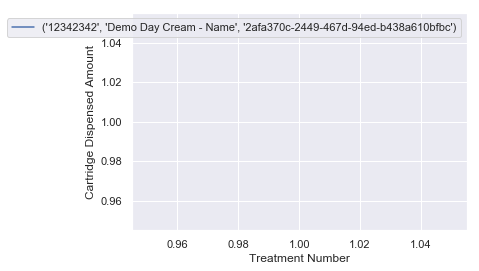

<Figure size 1440x720 with 0 Axes>

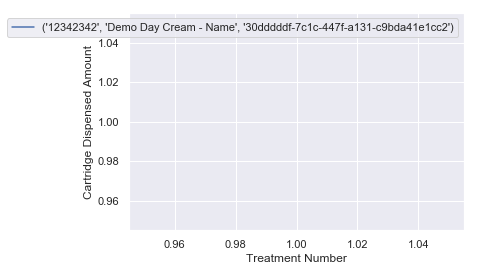

<Figure size 1440x720 with 0 Axes>

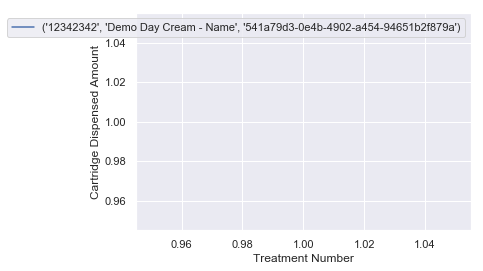

<Figure size 1440x720 with 0 Axes>

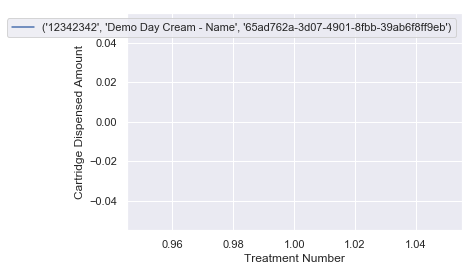

<Figure size 1440x720 with 0 Axes>

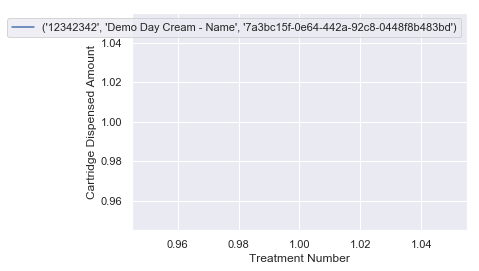

<Figure size 1440x720 with 0 Axes>

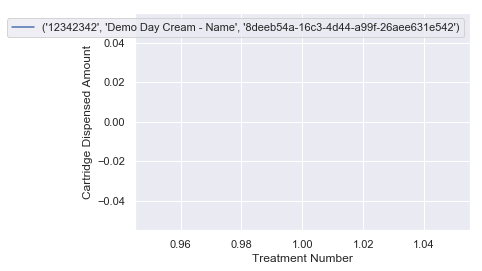

<Figure size 1440x720 with 0 Axes>

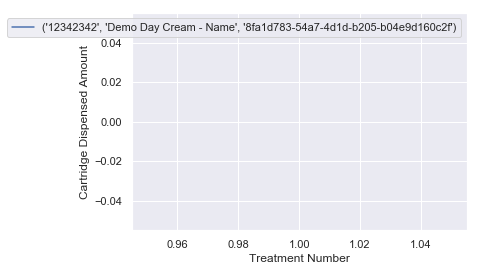

<Figure size 1440x720 with 0 Axes>

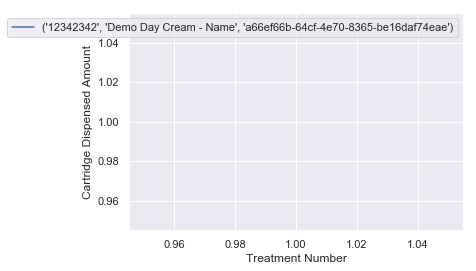

<Figure size 1440x720 with 0 Axes>

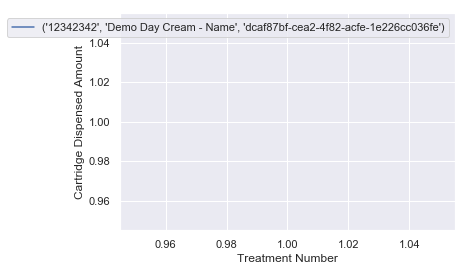

<Figure size 1440x720 with 0 Axes>

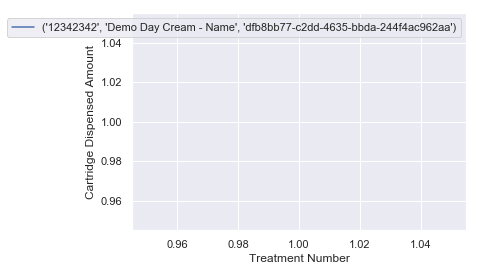

<Figure size 1440x720 with 0 Axes>

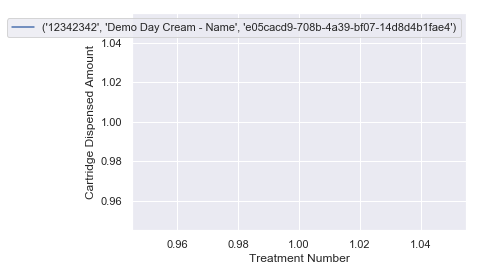

<Figure size 1440x720 with 0 Axes>

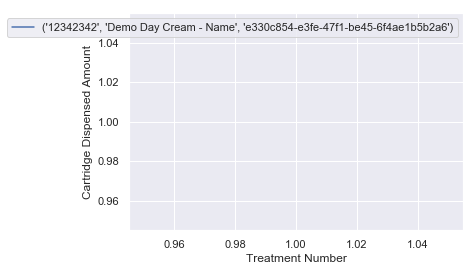

<Figure size 1440x720 with 0 Axes>

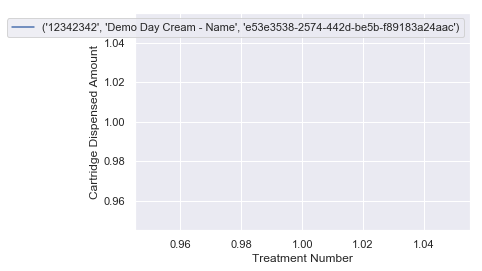

<Figure size 1440x720 with 0 Axes>

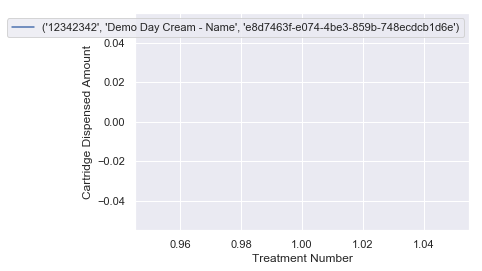

<Figure size 1440x720 with 0 Axes>

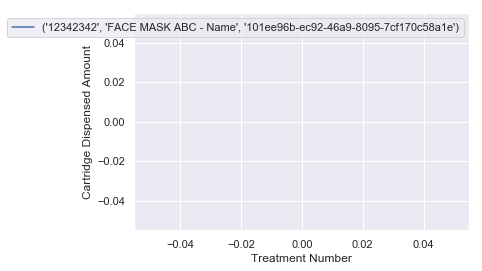

<Figure size 1440x720 with 0 Axes>

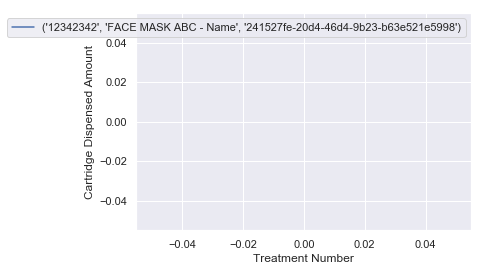

<Figure size 1440x720 with 0 Axes>

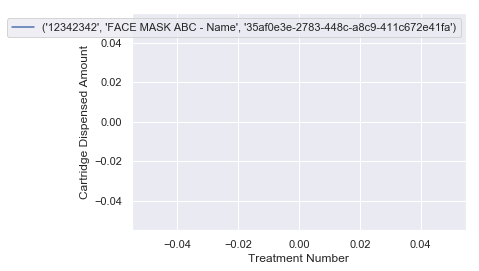

<Figure size 1440x720 with 0 Axes>

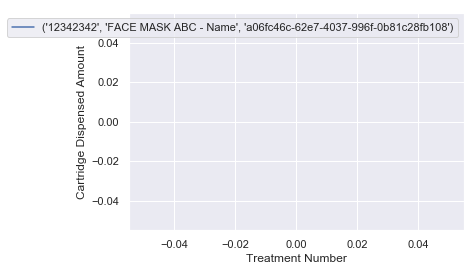

<Figure size 1440x720 with 0 Axes>

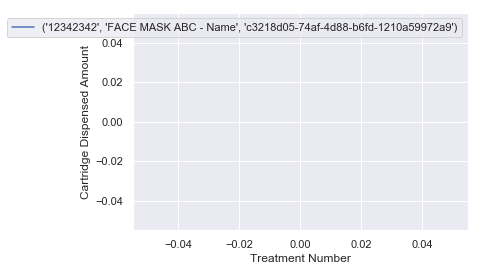

<Figure size 1440x720 with 0 Axes>

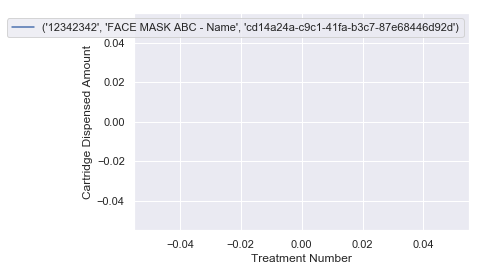

<Figure size 1440x720 with 0 Axes>

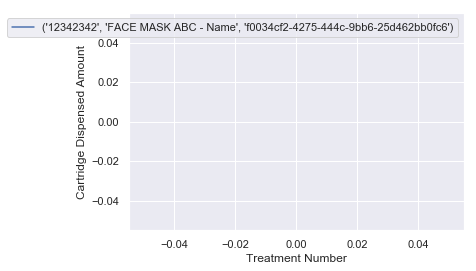

<Figure size 1440x720 with 0 Axes>

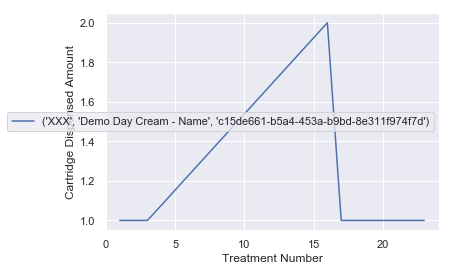

<Figure size 1440x720 with 0 Axes>

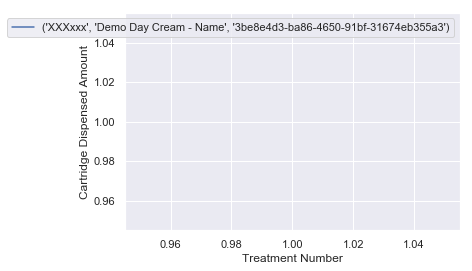

<Figure size 1440x720 with 0 Axes>

In [24]:
for name, data in df1.groupby(['CutitronicsClientID', 'CutitronicsSKUName', 'CutitronicsTreatmentID']):
    plt.plot(data['TreatmentNumber'], data['CartDispensedAmount'], label=name)
    plt.xlabel('Treatment Number')
    plt.ylabel('Cartridge Dispensed Amount')
    plt.legend()
    plt.show()

### Requirement 2
To understand the client's compliance with the provided prescription in terms of the usage time, frequency and amount of product used

In [20]:
dataShape(df2)

Data Shape: 
 (846, 26) 

Data Count: 
 idTreatmentCartDetails    846
CutitronicsTreatmentID    846
TreatmentNumber           846
CutitronicsCartID         831
CutitronicsSKUID          846
CartLevel                 834
CartState                 834
CartDispensedAmount       834
CutitronicsParameterID    834
CartEnvTemperature        846
CartEnvHumidity           846
CartEnvPollution          846
CartEnvUv                 846
Tracked                     0
CutitronicsClientID       846
TreatmentStartDate        822
TreatmentEndDate            0
TreatmentType             846
PrescriptionType          846
CutitronicsSKUCode        846
Frequency                 846
FrequencyType             846
UsageAM                   846
UsagePM                   846
Active                    846
prescribedOn              846
dtype: int64 

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 26 columns):
idTreatmentCartDetails    846 non-null int64
Cuti

,Total,Percent
TreatmentEndDate,846,100.000000
Tracked,846,100.000000
TreatmentStartDate,24,2.836879
CutitronicsCartID,15,1.773050
CartLevel,12,1.418440
CartState,12,1.418440
CartDispensedAmount,12,1.418440
CutitronicsParameterID,12,1.418440
prescribedOn,0,0.000000
CartEnvHumidity,0,0.000000


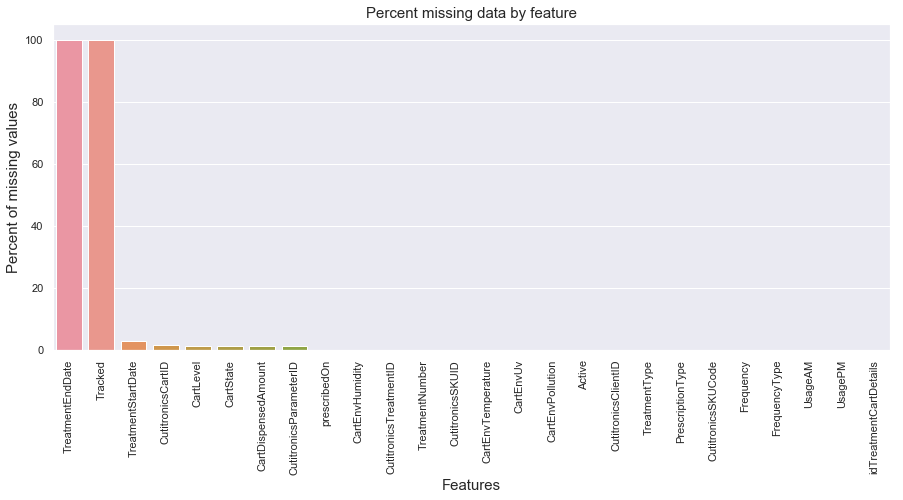

In [21]:
# Visualise missing values for DF
nanValues(df2)

#### Measure of Centre & Distribution

In [23]:
mmm(df2, 'CartLevel')
mmm(df2, 'CartDispensedAmount')
mmm(df2, 'CartEnvTemperature')
mmm(df2, 'CartEnvHumidity')
mmm(df2, 'CartEnvPollution')
mmm(df2, 'CartEnvUv')
mmm(df2, 'Frequency')
mmm(df2, 'UsageAM')
mmm(df2, 'UsagePM')

3Ms for CartLevel: 
 Mean:  19.14748201438849 
 Median:  20.5 
 Mode:  0     0.0
1    35.0
dtype: float64 
 Standard Dev:  10.878730181543295 

3Ms for CartDispensedAmount: 
 Mean:  1.9244604316546763 
 Median:  2.0 
 Mode:  0    2.0
dtype: float64 
 Standard Dev:  0.9089662790839371 

3Ms for CartEnvTemperature: 
 Mean:  78.177304964539 
 Median:  80.5 
 Mode:  0    98
dtype: int64 
 Standard Dev:  17.4539598686101 

3Ms for CartEnvHumidity: 
 Mean:  78.71985815602837 
 Median:  80.0 
 Mode:  0    94
1    96
dtype: int64 
 Standard Dev:  16.339685829219853 

3Ms for CartEnvPollution: 
 Mean:  76.84751773049645 
 Median:  78.0 
 Mode:  0    69
dtype: int64 
 Standard Dev:  16.870734781149817 

3Ms for CartEnvUv: 
 Mean:  78.26241134751773 
 Median:  80.5 
 Mode:  0    69
dtype: int64 
 Standard Dev:  17.078022995791827 

3Ms for Frequency: 
 Mean:  2.0 
 Median:  3.0 
 Mode:  0    3
dtype: int64 
 Standard Dev:  1.4150501277005438 

3Ms for UsageAM: 
 Mean:  1.3333333333333333 
 Median

In [34]:
df2.describe() 

,idTreatmentCartDetails,TreatmentNumber,CartLevel,CartDispensedAmount,CartEnvTemperature,CartEnvHumidity,CartEnvPollution,CartEnvUv,Tracked,TreatmentEndDate,Frequency,UsageAM,UsagePM
count,846.000000,846.000000,834.000000,834.000000,846.000000,846.000000,846.000000,846.000000,0.0,0.0,846.00000,846.000000,846.00000
mean,574.982270,8.421986,19.147482,1.924460,78.177305,78.719858,76.847518,78.262411,NaN,NaN,2.00000,1.333333,2.00000
std,82.310588,5.211770,10.878730,0.908966,17.453960,16.339686,16.870735,17.078023,NaN,NaN,1.41505,0.943367,1.41505
min,434.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.00000,0.000000,0.00000
25%,504.000000,4.000000,10.000000,1.000000,69.000000,70.000000,69.000000,69.000000,NaN,NaN,0.00000,0.000000,0.00000
50%,574.500000,8.000000,20.500000,2.000000,80.500000,80.000000,78.000000,80.500000,NaN,NaN,3.00000,2.000000,3.00000
75%,645.000000,12.000000,29.000000,3.000000,91.000000,91.000000,88.000000,89.000000,NaN,NaN,3.00000,2.000000,3.00000
max,732.000000,21.000000,39.000000,3.000000,99.000000,99.000000,99.000000,99.000000,NaN,NaN,3.00000,2.000000,3.00000


#### Visualising Categorical Data

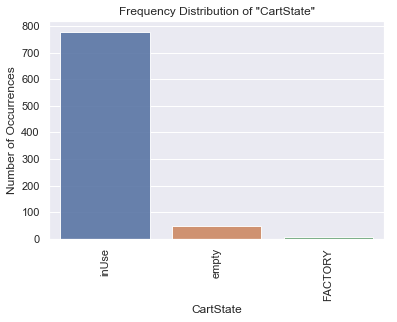

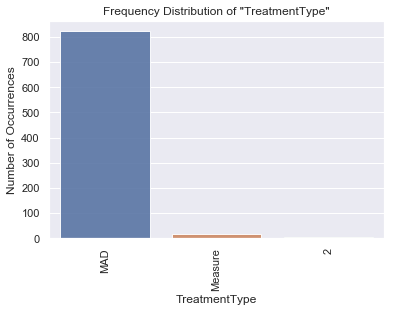

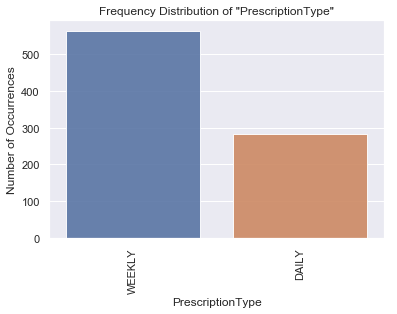

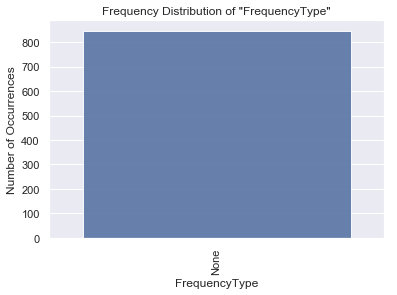

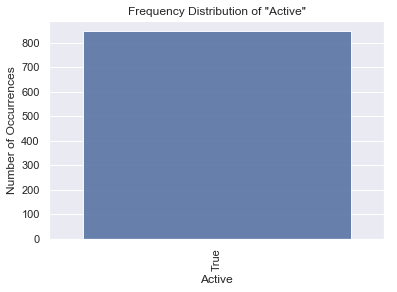

In [26]:
dist(df2, 'CartState')
dist(df2, 'TreatmentType')
dist(df2, 'PrescriptionType')
dist(df2, 'FrequencyType')
dist(df2, 'Active')

#### Visualising Numerical Data

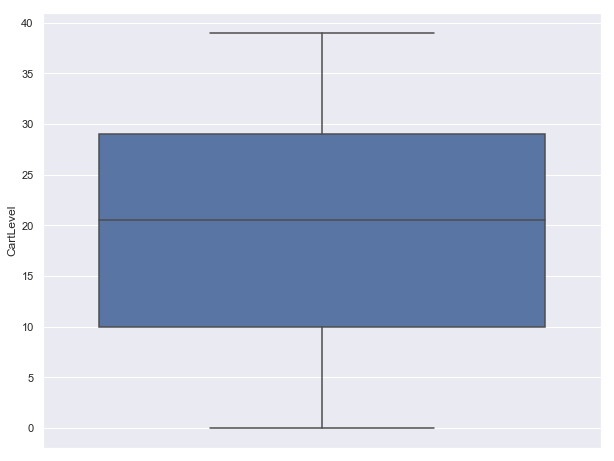

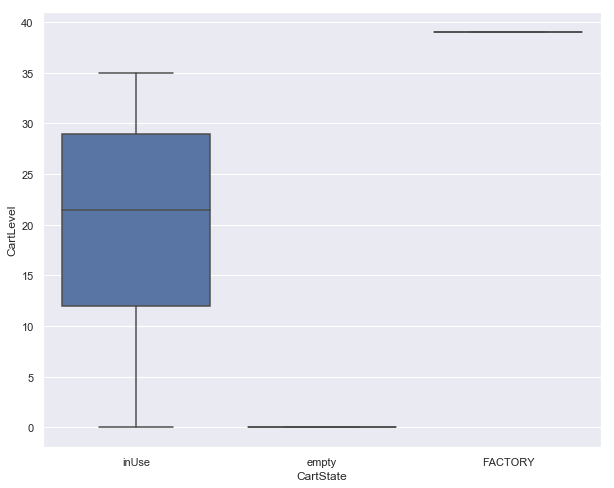

In [30]:
singleBoxplot(df2, 'CartLevel')
boxplot(df2, 'CartState', 'CartLevel'  )

### Requirement 3
To understand subjective data regarding the user's opinion as to how they believe the product is performing

In [35]:
dataShape(df3)

Data Shape: 
 (831, 27) 

Data Count: 
 idTreatmentCartDetails    831
CutitronicsTreatmentID    831
TreatmentNumber           831
CutitronicsCartID         831
CutitronicsSKUID          831
CartLevel                 831
CartState                 831
CartDispensedAmount       831
CutitronicsParameterID    831
CartEnvTemperature        831
CartEnvHumidity           831
CartEnvPollution          831
CartEnvUv                 831
Tracked                     0
CutitronicsClientID       831
TreatmentStartDate        822
TreatmentEndDate            0
TreatmentType             831
PrescriptionType          831
CutitronicsSKUCode        831
Frequency                 831
FrequencyType             831
UsageAM                   831
UsagePM                   831
Active                    831
prescribedOn              831
installDate                 0
dtype: int64 

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 27 columns):
idTreatmentCartDeta

,Total,Percent
installDate,831,100.000000
TreatmentEndDate,831,100.000000
Tracked,831,100.000000
TreatmentStartDate,9,1.083032
UsagePM,0,0.000000
CartEnvHumidity,0,0.000000
CutitronicsTreatmentID,0,0.000000
TreatmentNumber,0,0.000000
CutitronicsCartID,0,0.000000
CutitronicsSKUID,0,0.000000


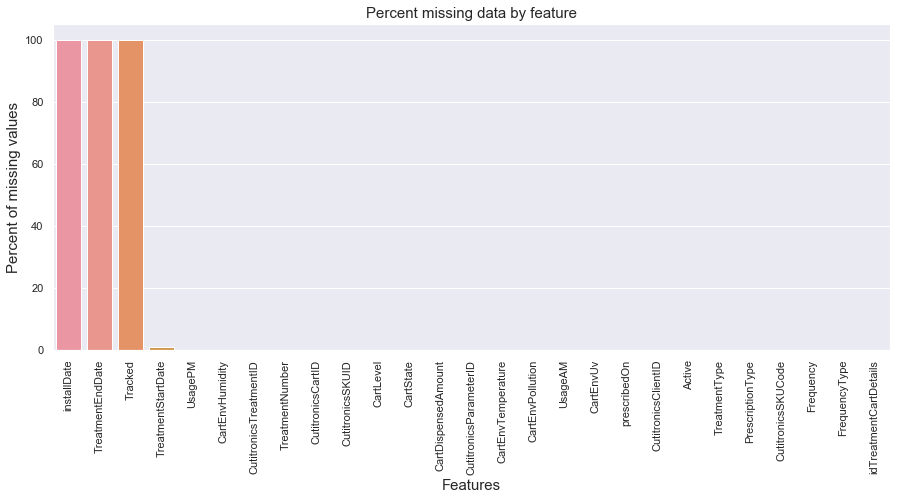

In [36]:
# Visualise missing values for DF
nanValues(df3)

#### Measure of Centre & Distribution

#### Visualising Categorical Data

#### Visualising Numerical Data

### Requirement 4
To understand any age variations in the products / product types being used

In [47]:
dataShape(df4_Cart)
dataShape(df4_Dev)

Data Shape: 
 (767, 23) 

Data Count: 
 idTreatmentCartDetails    767
CutitronicsTreatmentID    767
TreatmentNumber           767
CutitronicsCartID         753
CutitronicsSKUID          767
CartLevel                 754
CartState                 754
CartDispensedAmount       754
CutitronicsParameterID    754
CartEncBlock               38
CartDecBlock               47
CartEnvTemperature        767
CartEnvHumidity           767
CartEnvPollution          767
CartEnvUv                 767
Tracked                    29
CutitronicsClientID       767
TreatmentStartDate        743
TreatmentEndDate            0
TreatmentType             767
CutitronicsSKUType        767
CutitronicsSKUName        767
CutitronicsSKUCat         767
dtype: int64 

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 23 columns):
idTreatmentCartDetails    767 non-null int64
CutitronicsTreatmentID    767 non-null object
TreatmentNumber           767 non-null int64
Cut

,Total,Percent
TreatmentEndDate,767,100.000000
Tracked,738,96.219035
CartEncBlock,729,95.045632
CartDecBlock,720,93.872229
TreatmentStartDate,24,3.129074
CutitronicsCartID,14,1.825293
CutitronicsParameterID,13,1.694915
CartLevel,13,1.694915
CartState,13,1.694915
CartDispensedAmount,13,1.694915


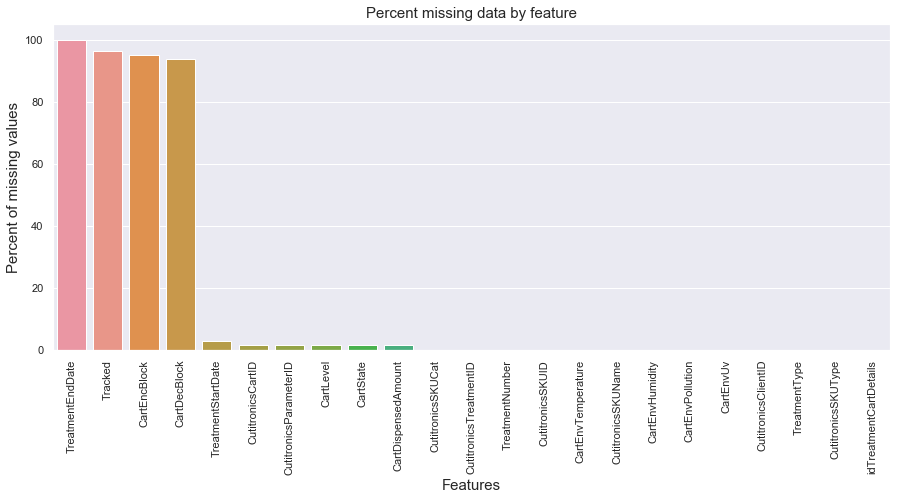

In [49]:
# Visualise missing values for DF
nanValues(df4_Cart)


,Total,Percent
TreatmentEndDate,752,100.000000
CutitronicsCtrlID,740,98.404255
MeasurementArea,727,96.675532
CtrlFirmwareVersion,707,94.015957
CtrlLongitude,707,94.015957
CtrlLatitude,707,94.015957
TreatmentStartDate,16,2.127660
CtrlDatetime,0,0.000000
CutitronicsTreatmentID,0,0.000000
TreatmentNumber,0,0.000000


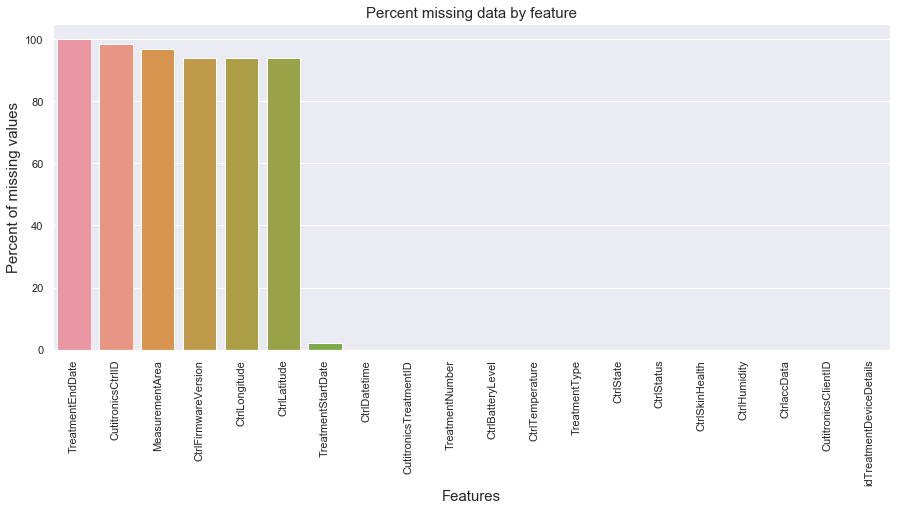

In [50]:
nanValues(df4_Dev)

#### Measure of Centre & Distribution

#### Visualising Categorical Data

#### Visualising Numerical Data

### Requirement 5
To understand subjective data regarding the user's opinion as to how they believe the product is performing.

In [ ]:
dataShape(df5)

In [ ]:
# Visualise missing values for DF
nanValues(df5)

#### Measure of Centre & Distribution

#### Visualising Categorical Data

#### Visualising Numerical Data

### Requirement 6/7
To understand the usage of product depending on seasonal change & For brands to understand the geographical variation in usage patterns.

In [ ]:
dataShape(df6_7)

In [ ]:
# Visualise missing values for DF
nanValues(df6_7)

#### Measure of Centre & Distribution

#### Visualising Categorical Data

#### Visualising Numerical Data